In [5]:
from bs4 import BeautifulSoup
import requests

In [9]:
url = "https://www.viator.com/tours/New-York-City/New-York-in-One-Day-Guided-Sightseeing-Tour/d687-7081NYCDAY"
#This is the website i will be targeting

In [43]:
response = requests.get(url)
allreviews=[]
soup = BeautifulSoup(response.text,'html.parser')      #this makes beutiful soup make a request to the website, and parses elements
content = soup.find('div',class_='reviews__1boD')
content = soup.find_all('div',class_='review__27Tn')

for i, text in enumerate(content):
    t = text.find_all('span')[1].text
    
    print(i,t)
    allreviews.append(t)
    
    #for subtext in t:
     #   print(subtext)
        
for review in allreviews:
    print(review)

0 Kevin was an excellent tour guide. He was very Knowledgeable and made the day very memorable and fun with his facts as well as a mix of history and current day NYC info.
1 Tour guide Rachel was great!  Very informative and interesting.  Really enjoyed the sights and history behind them.
2 This was the best experience seeing some of the most significant and memorable places in NY. Thanks to our tour guide Steve and driver. We had an enjoyable trip.
3 The person that did the was very knowledgeable and entertaining.  Best tour ever.  I loved it.  The bus was great.
4 Rachael was great, fun and knowledgeable 
Really enjoyed her being the tour guide 
I highly recommended her
5 Rachel was wonderful! We enjoyed our day with her very much. She gave lots of helpful tips for shopping and events in the city.   She takes time to get great group pictures of you and your party.  That was greatly appreciated! We would definitely go on another tour with her.
6 Rachel the tour guide was great, she ma

In [52]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
for review in allreviews:
    sentiment = analyzer.polarity_scores(review)
    print(sentiment)

{'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.8542}
{'neg': 0.0, 'neu': 0.561, 'pos': 0.439, 'compound': 0.899}
{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.902}
{'neg': 0.0, 'neu': 0.51, 'pos': 0.49, 'compound': 0.9465}
{'neg': 0.0, 'neu': 0.498, 'pos': 0.502, 'compound': 0.9199}
{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.9735}
{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.9325}
{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'compound': 0.68}
{'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'compound': 0.6901}
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.8271}
{'neg': 0.017, 'neu': 0.865, 'pos': 0.118, 'compound': 0.9293}
{'neg': 0.253, 'neu': 0.65, 'pos': 0.097, 'compound': -0.5879}
{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.9216}
{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.8402}
{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.927}
{'neg': 0.0, 'neu': 0.442, 'pos': 0.558, 'compound': 0.9561}
{'neg': 0.0, 'neu': 0.709, 'p

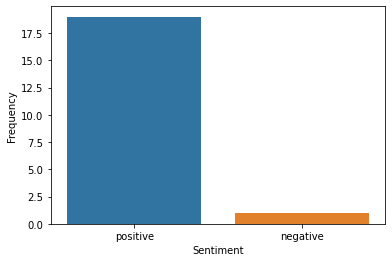

In [57]:
import pandas as pd
review_sentiments = []
for review in allreviews:
    sentiment = analyzer.polarity_scores(review)
    review_sentiments.append(sentiment)
df = pd.DataFrame(review_sentiments)
df['sentiment'] = ['positive' if score > 0 else 'negative' if score < 0 else 'neutral' for score in df['compound']]

sns.countplot(x='sentiment', data=df)
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zamja\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zamja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


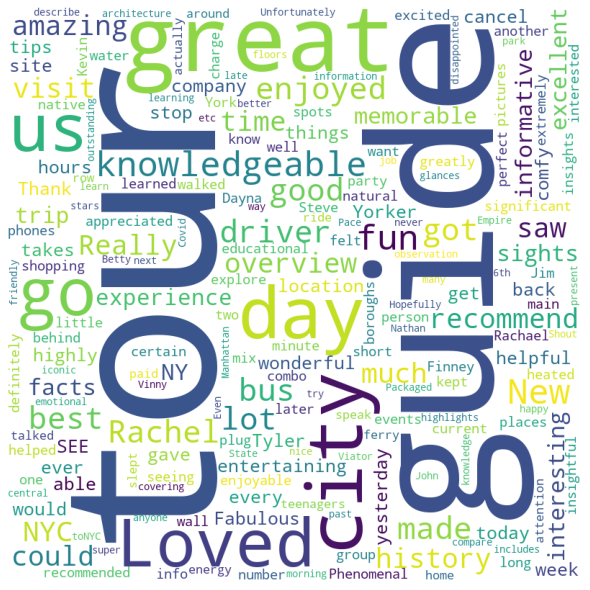

In [68]:
# Import the necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Prepare the reviews for wordcloud
allreviews_string = " ".join(allreviews)
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words("english"))
words = word_tokenize(allreviews_string)
words = [word for word in words if word.lower() not in stop_words]

# Create the wordcloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(" ".join(words))

# Plot the wordcloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zamja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zamja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


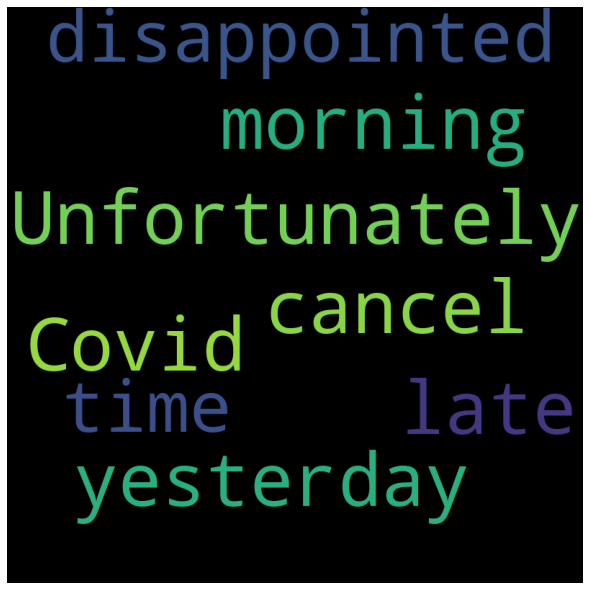

In [72]:
#this is for negative reviews only
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Prepare the reviews for wordcloud
analyzer = SentimentIntensityAnalyzer()
negative_reviews = []
for review in allreviews:
    sentiment = analyzer.polarity_scores(review)
    if sentiment['compound'] < 0:
        negative_reviews.append(review)

negative_reviews_string = " ".join(negative_reviews)
nltk.download('stopwords')
nltk.download('punkt')
more_stopwords = ["got", "hopefully", "try","next"]  #adding more stopwords
stop_words = set(stopwords.words("english") + more_stopwords)
words = word_tokenize(negative_reviews_string)
words = [word for word in words if word.lower() not in stop_words]

# Create the wordcloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 10).generate(" ".join(words))

# Plot the wordcloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zamja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zamja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


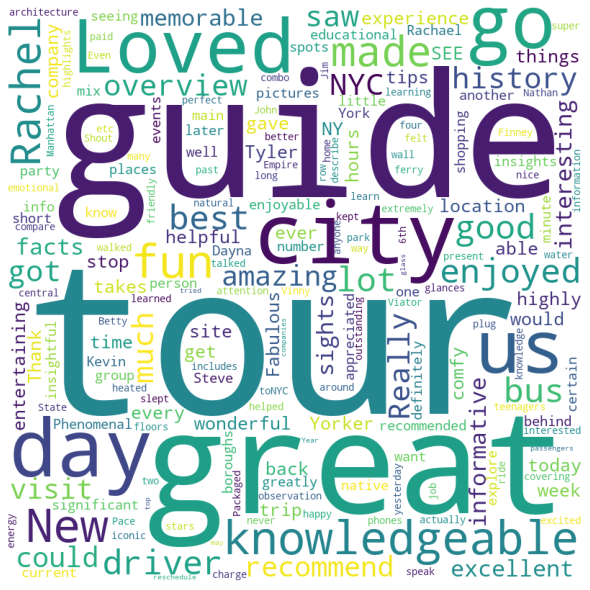

In [73]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Prepare the reviews for wordcloud
analyzer = SentimentIntensityAnalyzer()
positive_reviews = []
for review in allreviews:
    sentiment = analyzer.polarity_scores(review)
    if sentiment['compound'] > 0:
        positive_reviews.append(review)

positive_reviews_string = " ".join(positive_reviews)
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words("english"))
words = word_tokenize(positive_reviews_string)
words = [word for word in words if word.lower() not in stop_words]

# Create the wordcloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(" ".join(words))

# Plot the wordcloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()